# Introduction

In this notebook, using the data developed in the EDA-19 notebook, two studies will be completed: 
- Locus
- Strand.

These two study names appear frequently in the variables in the code below.

## Strand

This particular variable explains whether or not the sequences associated with Chromosome 19 are a protein. If the value is positive, then the sequence can make a protein. If the value is negative, then the sequence doesn't make a protein. Another way to think of this value is that a positive value means that particular length of DNA codes for something useful, and a negative value might constitute junk DNA. Currently, proteins are isolated first, then sequenced, and then that sequence is matched against a known genome. If this study produces predictive capabilities, then it is possible that in the instance of novel DNA, or RNA, that protein material can be predicted based on the amino acid composition dictated by the DNA, without first having to isolate the proteins separately. This would save a substantial amount of time and funding in the genomic world.

## Locus

This particular variable explains the location on Chromosome 19 where the associated genetic information for each variable is stored. When our body chooses to copy the genic blueprint to make a protein, this location is where that happens. If this study produces predictive capabilities, then it might be possible to target specific locations in a genetic code using amino acid content. This could replace the current necessity to radio-actively tag portions of genetic material for study. Additonally, the applications of this type of labeling system in the medical and research spheres are endless, to name a few: drug targeting, medicine development, individualizing medicine delievery, identifying disease.

# Table of Contents<a id='Table of Contents'></a>

<a href='#Data Import and Prep'>**1. Data Import and Prep**</a>

<a href='#Base Model'>**2. Base Model**</a>

<a href='#Final Model'>**3. Final Model**</a>

<a href='#Other Models'>**4. Other Models**</a>

<a href='#Conclusions'>**5. Conclusions**</a>

<a href='#References'>**5. References**</a>

<a href='#Future Work'>**6. Future Work**</a>

# Data Import and Prep<a id='Data Import and Prep'></a>

<a href='#Obtain-Scrub-Explore'>1.1 Obtain, Scrub, Explore</a>

<a href='#Data to Include'>1.2 Exploring Data to Include</a>

<a href='#Input Data'>1.3 Input Data</a>

<a href='#Locus Testing Set Up'>1.3.1 Locus Testing Set Up</a>

<a href='#Strand Testing Set Up'>1.3.2 Strand Testing Set Up</a>

<a href='#Train Test Splits'>1.4 Train Test Splits</a>

## Obtain, Scrub, Explore<a id='Obtain-Scrub-Explore'></a>

In [1]:
# import developed features
import pandas as pd
df = pd.read_csv('developed features 19.csv', index_col=0)
df.sample(5)

,#Replicon Name,Start,Stop,Strand,GeneID,Locus,Protein product,Length,Protein name,# Sequence-Name,...,Weight of Serines**2,Weight of Serines**3,Weight of Threonines**2,Weight of Threonines**3,Weight of Tryptophans**2,Weight of Tryptophans**3,Weight of Tyrosines**2,Weight of Tyrosines**3,Weight of Valines**2,Weight of Valines**3
1025,19,8053050,8062225,positive,6370,CCL25,NP_005615.2,150,C-C motif chemokine 25 isoform 1 precursor,19,...,2822400,4741632000,226576,107850176,665856,543338496,524176,379503424,1368900,1601613000
1653,19,12675838,12681113,negative,1725,DHPS,NP_001193903.1,327,deoxyhypusine synthase isoform d,19,...,3572100,6751269000,3625216,6902411264,1040400,1061208000,3276100,5929741000,6036849,14832537993
3953,19,41115964,41122880,positive,1572,CYP2F1,XP_016881876.1,314,cytochrome P450 2F1 isoform X7,19,...,8643600,25412184000,2039184,2911954752,374544,229220928,1605289,2033901163,2683044,4394826072
3024,19,35248879,35267859,positive,51599,LSR,NP_001247418.1,629,lipolysis-stimulated lipoprotein receptor isof...,19,...,37088100,225866529000,11909401,41099342851,5992704,14670139392,27552001,144620453249,20820969,95006081547
5615,19,51142370,51153245,positive,27036,SIGLEC7,NP_055200.1,467,sialic acid-binding Ig-like lectin 7 isoform 1...,19,...,26471025,136193423625,16370116,66233489336,4161600,8489664000,3964081,7892485271,14907321,57557166381


In [2]:
# nans identification
print(len(df))
df.isna().sum().sum()

7981


0

In [3]:
# look for nans
import numpy as np
columns = df.describe().columns
for column in columns:
    print(column)
    print(np.isinf(np.asarray(df[column])).sum())

Start
0
Stop
0
GeneID
0
Length
0
Sequence-Length
0
Molecular Weight
0
Number of Regions
0
Number of Binding Sites
0
Number of Alanines
0
Number of Arginines
0
Number of Asparagines
0
Number of Aspartic Acids
0
Number of Cysteines
0
Number of Glutamic Acids
0
Number of Glutamines
0
Number of Glycines
0
Number of Histidines
0
Number of Isoleucines
0
Number of Leucines
0
Number of Lysines
0
Number of Methionines
0
Number of Phenylalanines
0
Number of Prolines
0
Number of Selenocysteines
0
Number of Serines
0
Number of Threonines
0
Number of Tryptophans
0
Number of Tyrosines
0
Number of Valines
0
Length by Weight
0
Length by Regions
0
Length by Sites
0
Length by Alanines
0
Length by Arginines
0
Length by Asparagines
0
Length by Aspartic Acids
0
Length by Cysteines
0
Length by Glutamic Acids
0
Length by Glutamines
0
Length by Glycines
0
Length by Histidines
0
Length by Isoleucines
0
Length by Leucines
0
Length by Lysines
0
Length by Methionines
0
Length by Phenylalanines
0
Length by Proline

In [4]:
# look for duplicates
print('duplicated rows: ' + str(df.duplicated().sum()))

duplicated rows: 0


In [5]:
# code to drop duplicate row if necessary
# df.drop_duplicates(inplace=True)
# print('duplicated rows: ' + str(df.duplicated().sum()))
# print(len(df))
# df.head()

In [6]:
# look at data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7981 entries, 0 to 7980
Columns: 295 entries, #Replicon Name to Weight of Valines**3
dtypes: float64(142), int64(141), object(12)
memory usage: 18.0+ MB


In [7]:
# look at basic stats
df.describe()

,Start,Stop,GeneID,Length,Sequence-Length,Molecular Weight,Number of Regions,Number of Binding Sites,Number of Alanines,Number of Arginines,...,Weight of Serines**2,Weight of Serines**3,Weight of Threonines**2,Weight of Threonines**3,Weight of Tryptophans**2,Weight of Tryptophans**3,Weight of Tyrosines**2,Weight of Tyrosines**3,Weight of Valines**2,Weight of Valines**3
count,7.981000e+03,7.981000e+03,7.981000e+03,7981.000000,7.981000e+03,7.981000e+03,7981.000000,7981.000000,7981.000000,7981.000000,...,7.981000e+03,7.981000e+03,7.981000e+03,7.981000e+03,7.981000e+03,7.981000e+03,7.981000e+03,7.981000e+03,7.981000e+03,7.981000e+03
mean,2.684549e+07,2.686286e+07,2.124244e+06,541.809673,4.931202e+07,5.949900e+04,6.145721,4.968801,38.168400,33.810425,...,1.476312e+08,3.120884e+13,1.559955e+08,4.093666e+13,3.756917e+06,2.431349e+10,1.143370e+07,1.054670e+11,3.157250e+07,1.335664e+12
std,2.077843e+07,2.077664e+07,1.429802e+07,657.361605,2.130346e+07,7.001105e+04,8.698425,6.850564,45.215759,31.391824,...,2.881577e+09,7.816783e+14,3.468645e+09,1.030384e+15,1.716183e+07,3.045903e+11,4.181545e+07,1.110292e+12,3.210278e+08,2.815048e+13
min,2.300000e+02,2.149000e+03,1.000000e+00,32.000000,4.315600e+04,3.380000e+03,0.000000,0.000000,1.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.684833e+06,5.687945e+06,7.305000e+03,284.000000,5.861762e+07,3.053300e+04,1.000000,0.000000,17.000000,17.000000,...,5.336100e+06,1.232639e+10,2.775556e+06,4.624076e+09,3.745440e+05,2.292209e+08,1.179396e+06,1.280824e+09,3.080025e+06,5.405444e+09
50%,3.044356e+07,3.071100e+07,5.453100e+04,444.000000,5.861762e+07,4.825000e+04,2.000000,2.000000,25.000000,27.000000,...,1.428840e+07,5.401015e+10,7.491169e+06,2.050333e+10,1.040400e+06,1.061208e+09,3.964081e+06,7.892485e+09,6.625476e+06,1.705398e+10
75%,4.672060e+07,4.673881e+07,9.402500e+04,640.000000,5.861762e+07,7.112400e+04,7.000000,7.000000,45.000000,40.000000,...,3.335062e+07,1.925999e+11,1.734722e+07,7.225119e+10,2.663424e+06,4.346708e+09,1.182672e+07,4.067209e+10,1.582448e+07,6.294980e+10
max,5.856316e+07,5.857330e+07,1.122684e+08,14507.000000,5.861762e+07,1.519051e+06,57.000000,103.000000,789.000000,459.000000,...,7.724786e+10,2.146989e+16,9.360479e+10,2.863829e+16,3.996801e+08,7.990404e+12,9.579644e+08,2.964996e+13,8.392575e+09,7.688522e+14


<a href='#Data Import and Prep'>Back to section Data Import and Prep</a>

<a href='#Table of Contents'>Back to Table of Contents</a>

## Exploring Data to Include <a id='Data to Include'></a>

See specifics in cells below for rationale behind either keeping or dropping data.

In [8]:
# look at column names
for i in df.columns:
    print(i)

#Replicon Name
Start
Stop
Strand
GeneID
Locus
Protein product
Length
Protein name
# Sequence-Name
Sequence-Role
RefSeq-Accn
Assembly-Unit
Sequence-Length
UCSC-style-name
Accession Version
Molecular Weight
Number of Regions
Number of Binding Sites
Sequence
Number of Alanines
Number of Arginines
Number of Asparagines
Number of Aspartic Acids
Number of Cysteines
Number of Glutamic Acids
Number of Glutamines
Number of Glycines
Number of Histidines
Number of Isoleucines
Number of Leucines
Number of Lysines
Number of Methionines
Number of Phenylalanines
Number of Prolines
Number of Selenocysteines
Number of Serines
Number of Threonines
Number of Tryptophans
Number of Tyrosines
Number of Valines
Length by Weight
Length by Regions
Length by Sites
Length by Alanines
Length by Arginines
Length by Asparagines
Length by Aspartic Acids
Length by Cysteines
Length by Glutamic Acids
Length by Glutamines
Length by Glycines
Length by Histidines
Length by Isoleucines
Length by Leucines
Length by Lysines


In [9]:
# look at column - #Replicon Name
df['#Replicon Name'].unique() # either chromosome 19 or unassigned

array(['19', 'Un'], dtype=object)

In [10]:
# look at column - Strand
df['Strand'].unique() # chromosomes have two strands, negative and positive --> potential classification system that would yield information on organization of protein information

array(['positive', 'negative'], dtype=object)

In [11]:
# look at column - GeneID
df['GeneID'].unique() # drop this, human naming convention, also out of date naming system

array([    81099,      8612,     54531, ..., 112268337, 112268340,
       102725035], dtype=int64)

In [12]:
# look at column - Locus
df['Locus'].unique() # indicates location on chromosome where information is stored

array(['OR4F17', 'PLPP2', 'MIER2', ..., 'LOC112268337', 'LOC112268340',
       'LOC102725035'], dtype=object)

In [13]:
# look at column - Locus # of unique values
len(df['Locus'].unique()) # not a good way to classify protein information --> too many options

1414

In [14]:
# look at column - Locus # of unique values with more than fifty occurances
sum(df['Locus'].value_counts()>50) # however, if we dropped all data that has less than 50 entries, we get 7 categories to classify into

7

In [15]:
# look at column - Protein product
df['Protein product'].unique() # drop this, human naming convention

array(['NP_001005240.1', 'XP_011526698.1', 'NP_808211.1', ...,
       'XP_011546877.1', 'XP_011546876.1', 'NP_945339.2'], dtype=object)

In [16]:
# look at column - Protein product # of unique values
len(df['Protein product'].unique()) # one of the unique identifiers for one of the three datasets that compose this dataset

6749

In [17]:
# look at column - Protein name
df['Protein name'].unique() # unique identifer for this dataset

array(['olfactory receptor 4F17', 'phospholipid phosphatase 2 isoform X1',
       'phospholipid phosphatase 2 isoform 3', ...,
       'killer cell immunoglobulin-like receptor 2DS1 isoform X4',
       'killer cell immunoglobulin-like receptor 2DS1 isoform X3',
       'leukocyte receptor cluster member 9 isoform 1'], dtype=object)

In [18]:
# look at column - Protein name # of values
len(df['Protein name'])

7981

In [19]:
# set index to unique identifier
df.index = df['Protein name']

In [20]:
# look at column # Sequence-Name
df['# Sequence-Name'].unique() # drop this, human naming convention

array(['19', 'HSCHR19_5_CTG2', 'HSCHR19_4_CTG2', 'HG109_PATCH',
       'HSCHR19_1_CTG2', 'HSCHR19_2_CTG2', 'HSCHR19_3_CTG2',
       'HSCHR19_1_CTG3_1', 'HSCHR19_2_CTG3_1', 'HG26_PATCH',
       'HG2021_PATCH', 'HSCHR19_3_CTG3_1', 'HSCHR19LRC_COX1_CTG3_1',
       'HSCHR19LRC_COX2_CTG3_1', 'HSCHR19LRC_LRC_I_CTG3_1',
       'HSCHR19LRC_LRC_J_CTG3_1', 'HSCHR19LRC_LRC_S_CTG3_1',
       'HSCHR19LRC_LRC_T_CTG3_1', 'HSCHR19LRC_PGF1_CTG3_1',
       'HSCHR19KIR_0019-4656-A_CTG3_1', 'HSCHR19KIR_CA01-TA01_1_CTG3_1',
       'HSCHR19KIR_CA01-TA01_2_CTG3_1', 'HSCHR19KIR_CA01-TB04_CTG3_1',
       'HSCHR19KIR_CA01-TB01_CTG3_1', 'HSCHR19KIR_HG2394_CTG3_1',
       'HSCHR19KIR_502960008-2_CTG3_1', 'HSCHR19KIR_502960008-1_CTG3_1',
       'HSCHR19KIR_0010-5217-AB_CTG3_1', 'HSCHR19KIR_7191059-1_CTG3_1',
       'HSCHR19KIR_CA04_CTG3_1', 'HSCHR19KIR_HG2393_CTG3_1',
       'HSCHR19KIR_7191059-2_CTG3_1', 'HSCHR19KIR_HG2396_CTG3_1',
       'HSCHR19KIR_FH15_B_HAP_CTG3_1', 'HSCHR19KIR_G085_A_HAP_CTG3_1',
       'HSC

In [21]:
# look at column Sequence-Role
df['Sequence-Role'].unique() # drop this, human related notation for updating the database where information originated

array(['assembled-molecule', 'alt-scaffold', 'fix-patch', 'novel-patch'],
      dtype=object)

In [27]:
# look at column RefSeq-Accn
df['RefSeq-Accn'].unique() # drop this, human naming convention

array(['NC_000019.10', 'NT_187622.1', 'NT_187621.1', 'NW_021160022.1',
       'NW_003315962.1', 'NW_003315964.2', 'NW_003315965.1',
       'NW_003315963.1', 'NT_187619.1', 'NW_014040929.1',
       'NW_009646206.1', 'NT_187620.1', 'NW_003571054.1',
       'NW_003571055.2', 'NW_003571056.2', 'NW_003571057.2',
       'NW_003571058.2', 'NW_003571059.2', 'NW_003571060.1',
       'NW_016107300.1', 'NW_016107301.1', 'NW_016107302.1',
       'NW_016107303.1', 'NW_016107304.1', 'NW_016107305.1',
       'NW_016107306.1', 'NW_016107307.1', 'NW_016107308.1',
       'NW_016107309.1', 'NW_016107311.1', 'NW_016107312.1',
       'NW_016107313.1', 'NW_016107314.1', 'NT_187636.1', 'NT_187637.1',
       'NT_187638.1', 'NT_187639.1', 'NT_187640.1', 'NT_187641.1',
       'NT_187642.1', 'NT_187643.1', 'NT_187644.1', 'NT_187645.1',
       'NT_187668.1', 'NT_187669.1', 'NT_187670.1', 'NT_187671.1',
       'NT_187672.1', 'NT_187673.1', 'NT_187674.1', 'NT_187675.1',
       'NT_187676.1', 'NT_187677.1', 'NT_1876

In [28]:
# look at column Assembly-Unit
df['Assembly-Unit'].unique() # potential classifier, the alt ref loci groups show different protein sequences than is shown in the primary assembly

array(['Primary Assembly', 'ALT_REF_LOCI_1', 'PATCHES', 'ALT_REF_LOCI_2',
       'ALT_REF_LOCI_3', 'ALT_REF_LOCI_4', 'ALT_REF_LOCI_5',
       'ALT_REF_LOCI_6', 'ALT_REF_LOCI_7', 'ALT_REF_LOCI_10',
       'ALT_REF_LOCI_11', 'ALT_REF_LOCI_12', 'ALT_REF_LOCI_13',
       'ALT_REF_LOCI_14', 'ALT_REF_LOCI_15', 'ALT_REF_LOCI_16',
       'ALT_REF_LOCI_17', 'ALT_REF_LOCI_18', 'ALT_REF_LOCI_19',
       'ALT_REF_LOCI_20', 'ALT_REF_LOCI_21', 'ALT_REF_LOCI_22',
       'ALT_REF_LOCI_23', 'ALT_REF_LOCI_24', 'ALT_REF_LOCI_25',
       'ALT_REF_LOCI_26', 'ALT_REF_LOCI_27', 'ALT_REF_LOCI_28',
       'ALT_REF_LOCI_29', 'ALT_REF_LOCI_30', 'ALT_REF_LOCI_31',
       'ALT_REF_LOCI_32', 'ALT_REF_LOCI_33', 'ALT_REF_LOCI_34',
       'ALT_REF_LOCI_35'], dtype=object)

In [29]:
# look at column Assembly-Unit value counts
df['Assembly-Unit'].value_counts() # need to correct for bias, outside of scope of this project

Primary Assembly    6702
PATCHES              266
ALT_REF_LOCI_1       158
ALT_REF_LOCI_7       120
ALT_REF_LOCI_2        86
ALT_REF_LOCI_4        64
ALT_REF_LOCI_3        62
ALT_REF_LOCI_6        60
ALT_REF_LOCI_5        59
ALT_REF_LOCI_27       33
ALT_REF_LOCI_29       27
ALT_REF_LOCI_28       23
ALT_REF_LOCI_26       22
ALT_REF_LOCI_30       22
ALT_REF_LOCI_23       22
ALT_REF_LOCI_10       20
ALT_REF_LOCI_33       17
ALT_REF_LOCI_35       17
ALT_REF_LOCI_22       17
ALT_REF_LOCI_14       17
ALT_REF_LOCI_18       17
ALT_REF_LOCI_20       17
ALT_REF_LOCI_12       14
ALT_REF_LOCI_15       13
ALT_REF_LOCI_16       13
ALT_REF_LOCI_31       12
ALT_REF_LOCI_11       10
ALT_REF_LOCI_25       10
ALT_REF_LOCI_34       10
ALT_REF_LOCI_19        9
ALT_REF_LOCI_13        9
ALT_REF_LOCI_32        9
ALT_REF_LOCI_21        9
ALT_REF_LOCI_17        9
ALT_REF_LOCI_24        6
Name: Assembly-Unit, dtype: int64

In [30]:
# look at column UCSC-style-name
df['UCSC-style-name'].unique() # drop this, human naming convention

array(['chr19', 'chr19_KI270868v1_alt', 'chr19_KI270865v1_alt', 'na',
       'chr19_GL383573v1_alt', 'chr19_GL383575v2_alt',
       'chr19_GL383576v1_alt', 'chr19_GL383574v1_alt',
       'chr19_KI270866v1_alt', 'chr19_KI270867v1_alt',
       'chr19_GL949746v1_alt', 'chr19_GL949747v2_alt',
       'chr19_GL949748v2_alt', 'chr19_GL949749v2_alt',
       'chr19_GL949750v2_alt', 'chr19_GL949751v2_alt',
       'chr19_GL949752v1_alt', 'chr19_KI270882v1_alt',
       'chr19_KI270883v1_alt', 'chr19_KI270884v1_alt',
       'chr19_KI270885v1_alt', 'chr19_KI270886v1_alt',
       'chr19_KI270887v1_alt', 'chr19_KI270888v1_alt',
       'chr19_KI270889v1_alt', 'chr19_KI270890v1_alt',
       'chr19_KI270891v1_alt', 'chr19_KI270914v1_alt',
       'chr19_KI270915v1_alt', 'chr19_KI270916v1_alt',
       'chr19_KI270917v1_alt', 'chr19_KI270918v1_alt',
       'chr19_KI270919v1_alt', 'chr19_KI270920v1_alt',
       'chr19_KI270921v1_alt', 'chr19_KI270922v1_alt',
       'chr19_KI270923v1_alt', 'chr19_KI270929v1_a

In [31]:
# look at column Accession Version
df['Accession Version'].unique() # drop this, human naming convention

array(['NP_001005240.1', 'XP_011526698.1', 'NP_808211.1', ...,
       'XP_011546877.1', 'XP_011546876.1', 'NP_945339.2'], dtype=object)

In [32]:
# look at column Accession Version unique value count
len(df['Accession Version'].unique()) # one of the unique identifiers for one of the three datasets that compose this dataset

6749

In [33]:
# look at column Sequence
df['Sequence'].unique() # drop this, information about sequence has been pulled out as number of amino acids present

array(['mvtefiflglsdsqglqtflfmlffvfyggivfgnllivitvvsdshlhspmyfllanlslidlslssvtapkmitdffsqrkvisfkgclvqifllhffggsemviliamgfdryiaickplhyttimcgnacvgimavawgigflhsvsqlafavhlpfcgpnevdsfycdlprviklactdtyrldimviansgvltvcsfvlliisytiilmtiqhrpldksskalstltahitvvllffgpcvfiyawpfpiksldkflavfysvitpllnpiiytlrnkdmktairqlrkwdahssvkf',
       'mqrrwvfvlldvlcllvgfssppaslpfailtlvnapykrgfycgddsirypyrpdtithglmagvtitatvilvsageaylvytdrlysrsdfnnyvaavykvlgtflfgaavsqsltdlakymigrlrpnflavcdpdwsrvncsvyvqlekvcrgnpadvtearlsfysghssfgmycmvflalyvqarlcwkwarllrptvqfflvafalyvgytrvsdykhhwsdvlvgllqgalvaaltvcyisdffkarppqhclkeeelerkpslsltltlgeadhnhygyphsss',
       'mgvargpgsrgqhppprqqevcaegprarlhpappglgaslpfailtlvnapykrgfycgddsirypyrpdtithglmagvtitatvilvsageaylvytdrlysrsdfnnyvaavykvlgtflfgaavsqsltdlakymigrlrpnflavcdpdwsrvncsvyvqlekvcrgnpadvtearlsfysghssfgmycmvflalyvqarlcwkwarllrptvqfflvafalyvgytrvsdykhhwsdvlvgllqgalvaaltvcyisdffkarppqhclkeeelerkpslsltltlgeadhnhygyphsss',
       ...,
       'mtpaltallclglslgprtrvqagpfpkptlwaepgsvi

In [34]:
# look at column Sequence unique values
len(df['Sequence'].unique()) # this means that there are only 4739 unique proteins in our dataset of 7981

4739

<a href='#Data Import and Prep'>Back to section Data Import and Prep</a>

<a href='#Table of Contents'>Back to Table of Contents</a>

## Input Data<a id='Input Data'></a>

In [37]:
to_drop = ['GeneID', 'Protein product', '# Sequence-Name', 'Sequence-Role', 
           'RefSeq-Accn', 'UCSC-style-name', 'Accession Version', 'Sequence', 'Protein name']

In [38]:
df = df.drop(to_drop, axis=1)
df.sample(5)

,#Replicon Name,Start,Stop,Strand,Locus,Length,Assembly-Unit,Sequence-Length,Molecular Weight,Number of Regions,...,Weight of Serines**2,Weight of Serines**3,Weight of Threonines**2,Weight of Threonines**3,Weight of Tryptophans**2,Weight of Tryptophans**3,Weight of Tyrosines**2,Weight of Tyrosines**3,Weight of Valines**2,Weight of Valines**3
Protein name,,,,,,,,,,,,,,,,,,,,,
E3 ubiquitin-protein ligase UHRF1 isoform 1,19,4910886,4960803,positive,UHRF1,793,Primary Assembly,58617616.0,89683,15,...,38378025,237751864875,18352656,78622778304,8156736,23295638016,23882769,116715092103,41409225,266468362875
fizzy-related protein homolog isoform 1,19,3522990,3534836,positive,FZR1,496,Primary Assembly,58617616.0,55048,15,...,33350625,192599859375,13608721,50202571769,8156736,23295638016,3964081,7892485271,15824484,62949797352
killer cell immunoglobulin-like receptor 3DL2 isoform 2 precursor,Un,754866,771106,positive,KIR3DL2,438,ALT_REF_LOCI_7,987100.0,46277,4,...,20385225,92039290875,6853924,17943573032,1498176,1833767424,5536609,13027640977,16769025,68669157375
"POU domain, class 2, transcription factor 2 isoform X5",19,42091257,42132411,negative,POU2F2,701,Primary Assembly,58617616.0,71429,0,...,114704100,1228480911000,34000561,198257271191,166464,67917312,131044,47437928,6036849,14832537993
zinc finger and SCAN domain-containing protein 5C,19,56205914,56209200,positive,ZSCAN5C,496,Primary Assembly,58617616.0,55598,8,...,19448100,85766121000,10323369,33168984597,374544,229220928,819025,741217625,9253764,28149950088


<a href='#Data Import and Prep'>Back to section Data Import and Prep</a>

<a href='#Table of Contents'>Back to Table of Contents</a>

### Locus Testing Set Up<a id='Locus Testing Set Up'></a>

In [39]:
# determining the number of loci to focus on
locus_focus = pd.DataFrame()
locus_focus['Counts'] = df['Locus'].value_counts()
locus_focus[locus_focus['Counts']>=33]['Counts'].sum()

1064

In [40]:
# how many unique locuses are in this number of loci to focus on
len(list(locus_focus[locus_focus['Counts']>=33].index))

20

In [41]:
# generate dataframe with these loci only
locuses_to_focus = list(locus_focus[locus_focus['Counts']>=33].index)
dfs_locus = []
for locus in locuses_to_focus:
    dfs_locus.append(df[df['Locus']==locus])
df_locus = pd.concat(dfs_locus)
df_locus.sample(5)

,#Replicon Name,Start,Stop,Strand,Locus,Length,Assembly-Unit,Sequence-Length,Molecular Weight,Number of Regions,...,Weight of Serines**2,Weight of Serines**3,Weight of Threonines**2,Weight of Threonines**3,Weight of Tryptophans**2,Weight of Tryptophans**3,Weight of Tyrosines**2,Weight of Tyrosines**3,Weight of Valines**2,Weight of Valines**3
Protein name,,,,,,,,,,,,,,,,,,,,,
dermokine isoform X12,19,35498716,35513475,negative,DMKN,476,Primary Assembly,58617616.0,47094,0,...,38378025,237751864875,5112121,11558505581,7033104,18651791808,2096704,3036027392,7241481,19486825371
natural cytotoxicity triggering receptor 1 isoform a precursor,Un,180406,184315,positive,NCR1,304,ALT_REF_LOCI_30,186203.0,32335,2,...,4862025,10720765125,8850625,26330609375,2663424,4346707968,3964081,7892485271,6036849,14832537993
zinc finger protein 266 isoform 1,19,9413275,9418538,negative,ZNF266,549,Primary Assembly,58617616.0,61985,17,...,34574400,203297472000,23804641,116142843439,374544,229220928,7371225,20012875875,3956121,7868724669
40S ribosomal protein S9 isoform a,Un,176167,182557,positive,RPS9,194,ALT_REF_LOCI_5,1066390.0,22460,1,...,540225,397065375,354025,210644875,166464,67917312,524176,379503424,2683044,4394826072
V-set and transmembrane domain-containing protein 1 isoform 4,Un,15328,38144,negative,VSTM1,116,ALT_REF_LOCI_6,1002683.0,12479,0,...,4410000,9261000000,1416100,1685159000,0,0,294849,160103007,342225,200201625


In [42]:
# setting up target and feature values for classification by locus testing
target_locus = df_locus['Locus']
features_locus = df_locus.drop('Locus', axis=1)
features_locus = pd.get_dummies(features_locus)
features_locus.sample(5)

,Start,Stop,Length,Sequence-Length,Molecular Weight,Number of Regions,Number of Binding Sites,Number of Alanines,Number of Arginines,Number of Asparagines,...,Assembly-Unit_ALT_REF_LOCI_32,Assembly-Unit_ALT_REF_LOCI_33,Assembly-Unit_ALT_REF_LOCI_34,Assembly-Unit_ALT_REF_LOCI_35,Assembly-Unit_ALT_REF_LOCI_4,Assembly-Unit_ALT_REF_LOCI_5,Assembly-Unit_ALT_REF_LOCI_6,Assembly-Unit_ALT_REF_LOCI_7,Assembly-Unit_PATCHES,Assembly-Unit_Primary Assembly
Protein name,,,,,,,,,,,,,,,,,,,,,
carcinoembryonic antigen-related cell adhesion molecule 21 isoform X5,41579313,41585871,165,58617616.0,17852,1,0,8,8,8,...,0,0,0,0,0,0,0,0,0,1
leukocyte immunoglobulin-like receptor subfamily B member 1 isoform 6 precursor,535952,538907,456,987100.0,46969,5,4,26,21,8,...,0,0,0,0,0,0,0,1,0,0
"NACHT, LRR and PYD domains-containing protein 2 isoform 3",615218,646100,1039,729520.0,117753,12,3,63,60,35,...,0,0,0,0,0,0,0,0,0,0
carcinoembryonic antigen-related cell adhesion molecule 21 isoform 3,41579313,41585871,165,58617616.0,17852,1,0,8,8,8,...,0,0,0,0,0,0,0,0,0,1
killer cell immunoglobulin-like receptor 2DS4 isoform 2 precursor,108711,123153,239,187935.0,23666,3,5,14,6,6,...,0,0,0,0,0,0,0,0,0,0


In [43]:
# checking column names for classification by locus testing
for i in features_locus.columns:
    print(i)

Start
Stop
Length
Sequence-Length
Molecular Weight
Number of Regions
Number of Binding Sites
Number of Alanines
Number of Arginines
Number of Asparagines
Number of Aspartic Acids
Number of Cysteines
Number of Glutamic Acids
Number of Glutamines
Number of Glycines
Number of Histidines
Number of Isoleucines
Number of Leucines
Number of Lysines
Number of Methionines
Number of Phenylalanines
Number of Prolines
Number of Selenocysteines
Number of Serines
Number of Threonines
Number of Tryptophans
Number of Tyrosines
Number of Valines
Length by Weight
Length by Regions
Length by Sites
Length by Alanines
Length by Arginines
Length by Asparagines
Length by Aspartic Acids
Length by Cysteines
Length by Glutamic Acids
Length by Glutamines
Length by Glycines
Length by Histidines
Length by Isoleucines
Length by Leucines
Length by Lysines
Length by Methionines
Length by Phenylalanines
Length by Prolines
Length by Selenocysteines
Length by Serines
Length by Threonines
Length by Tryptophans
Length by 

<a href='#Data Import and Prep'>Back to Data Import and Prep</a>

<a href='#Table of Contents'>Back to Table of Contents</a>

### Strand Testing Set Up<a id='Strand Testing Set Up'></a>

In [44]:
# set up dataframe for classification by strand testing
df_strand = pd.get_dummies(df, drop_first=True)
df_strand.sample(5)

,Start,Stop,Length,Sequence-Length,Molecular Weight,Number of Regions,Number of Binding Sites,Number of Alanines,Number of Arginines,Number of Asparagines,...,Assembly-Unit_ALT_REF_LOCI_32,Assembly-Unit_ALT_REF_LOCI_33,Assembly-Unit_ALT_REF_LOCI_34,Assembly-Unit_ALT_REF_LOCI_35,Assembly-Unit_ALT_REF_LOCI_4,Assembly-Unit_ALT_REF_LOCI_5,Assembly-Unit_ALT_REF_LOCI_6,Assembly-Unit_ALT_REF_LOCI_7,Assembly-Unit_PATCHES,Assembly-Unit_Primary Assembly
Protein name,,,,,,,,,,,,,,,,,,,,,
doublesex- and mab-3-related transcription factor C2 isoform X5,41848491,41851696,244,58617616.0,25219,1,0,15,8,3,...,0,0,0,0,0,0,0,0,0,1
coiled-coil domain-containing protein 9,47258401,47271678,531,58617616.0,59572,2,18,41,62,11,...,0,0,0,0,0,0,0,0,0,1
osteoclast-associated immunoglobulin-like receptor isoform 4 precursor,69599,75196,263,1066390.0,26746,3,2,23,20,5,...,0,0,0,0,0,1,0,0,0,0
zinc finger protein 536 isoform 2,30443563,30643550,1302,58617616.0,141547,14,11,92,59,43,...,0,0,0,0,0,0,0,0,0,1
zinc finger protein 266 isoform 1,9413275,9418538,549,58617616.0,61985,17,16,23,29,18,...,0,0,0,0,0,0,0,0,0,1


In [45]:
# number of positive values for classification by strand testing
df_strand['Strand_positive'].sum()

3953

In [46]:
# check column names in dataframe for strand testing
for i in df_strand.columns:
    print(i)

Start
Stop
Length
Sequence-Length
Molecular Weight
Number of Regions
Number of Binding Sites
Number of Alanines
Number of Arginines
Number of Asparagines
Number of Aspartic Acids
Number of Cysteines
Number of Glutamic Acids
Number of Glutamines
Number of Glycines
Number of Histidines
Number of Isoleucines
Number of Leucines
Number of Lysines
Number of Methionines
Number of Phenylalanines
Number of Prolines
Number of Selenocysteines
Number of Serines
Number of Threonines
Number of Tryptophans
Number of Tyrosines
Number of Valines
Length by Weight
Length by Regions
Length by Sites
Length by Alanines
Length by Arginines
Length by Asparagines
Length by Aspartic Acids
Length by Cysteines
Length by Glutamic Acids
Length by Glutamines
Length by Glycines
Length by Histidines
Length by Isoleucines
Length by Leucines
Length by Lysines
Length by Methionines
Length by Phenylalanines
Length by Prolines
Length by Selenocysteines
Length by Serines
Length by Threonines
Length by Tryptophans
Length by 

In [47]:
# setting up target and feature values for classification by strand testing
target_strand = df_strand['Strand_positive']
features_strand = df_strand.drop(['Strand_positive'], axis=1)
features_strand.sample(5)

,Start,Stop,Length,Sequence-Length,Molecular Weight,Number of Regions,Number of Binding Sites,Number of Alanines,Number of Arginines,Number of Asparagines,...,Assembly-Unit_ALT_REF_LOCI_32,Assembly-Unit_ALT_REF_LOCI_33,Assembly-Unit_ALT_REF_LOCI_34,Assembly-Unit_ALT_REF_LOCI_35,Assembly-Unit_ALT_REF_LOCI_4,Assembly-Unit_ALT_REF_LOCI_5,Assembly-Unit_ALT_REF_LOCI_6,Assembly-Unit_ALT_REF_LOCI_7,Assembly-Unit_PATCHES,Assembly-Unit_Primary Assembly
Protein name,,,,,,,,,,,,,,,,,,,,,
adhesion G protein-coupled receptor L1 isoform X8,14150873,14170750,1425,58617616.0,156657,6,0,109,80,74,...,0,0,0,0,0,0,0,0,0,1
killer cell immunoglobulin-like receptor 2DL4 isoform c precursor,105248,115748,342,168131.0,34844,2,0,25,18,11,...,0,0,0,0,0,0,0,0,1,0
zinc finger protein 540 isoform a,37598448,37613263,660,58617616.0,76963,20,20,13,43,15,...,0,0,0,0,0,0,0,0,0,1
protein phosphatase 1 regulatory subunit 12C isoform X2,55091472,55117543,781,58617616.0,84622,9,1,103,84,16,...,0,0,0,0,0,0,0,0,0,1
DNA-directed RNA polymerase II subunit RPB9,36113755,36114856,125,58617616.0,14392,2,3,8,7,6,...,0,0,0,0,0,0,0,0,0,1


In [48]:
# checking column names for classification by strand testing
for i in features_strand.columns:
    print(i)

Start
Stop
Length
Sequence-Length
Molecular Weight
Number of Regions
Number of Binding Sites
Number of Alanines
Number of Arginines
Number of Asparagines
Number of Aspartic Acids
Number of Cysteines
Number of Glutamic Acids
Number of Glutamines
Number of Glycines
Number of Histidines
Number of Isoleucines
Number of Leucines
Number of Lysines
Number of Methionines
Number of Phenylalanines
Number of Prolines
Number of Selenocysteines
Number of Serines
Number of Threonines
Number of Tryptophans
Number of Tyrosines
Number of Valines
Length by Weight
Length by Regions
Length by Sites
Length by Alanines
Length by Arginines
Length by Asparagines
Length by Aspartic Acids
Length by Cysteines
Length by Glutamic Acids
Length by Glutamines
Length by Glycines
Length by Histidines
Length by Isoleucines
Length by Leucines
Length by Lysines
Length by Methionines
Length by Phenylalanines
Length by Prolines
Length by Selenocysteines
Length by Serines
Length by Threonines
Length by Tryptophans
Length by 

<a href='#Data Import and Prep'>Back to section Data Import and Prep</a>

<a href='#Table of Contents'>Back to Table of Contents</a>

## Train Test Splits <a id='Train Test Splits'></a>

In [49]:
# train test split for locus testing
from sklearn.model_selection import train_test_split
features_locus_train, features_locus_test, target_locus_train, target_locus_test = train_test_split(features_locus, 
                                                                                                    target_locus, 
                                                                                                    test_size=0.25, 
                                                                                                    random_state=19)

In [50]:
# train test split for strand testing
features_strand_train, features_strand_test, target_strand_train, target_strand_test = train_test_split(features_strand, 
                                                                                                        target_strand, 
                                                                                                        test_size=0.25, 
                                                                                                        random_state=19)

<a href='#Data Import and Prep'>Back to section Data Import and Prep</a>

<a href='#Table of Contents'>Back to Table of Contents</a>

# Base Model<a id='Base Model'></a>

## Decision Tree

In [51]:
# base decision tree for locus testing
from sklearn.tree import DecisionTreeClassifier
base_locus_clf = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=19)
base_locus_clf.fit(features_locus_train, target_locus_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=19, splitter='best')

In [52]:
# base decision tree accuracy scores for locus testing
from sklearn.metrics import accuracy_score
print('Locus Base Decision Tree Training Accuracy is: {0}'.format(base_locus_clf.score(features_locus_train, target_locus_train)*100))
print('Locus Base Decision Tree Testing Accuracy is: {0}'.format(base_locus_clf.score(features_locus_test, target_locus_test)*100))

Locus Base Decision Tree Training Accuracy is: 63.65914786967418
Locus Base Decision Tree Testing Accuracy is: 57.89473684210527


C:\Users\eannefawcett\Anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
C:\Users\eannefawcett\Anaconda3\envs\learn-env\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


0.5789473684210527

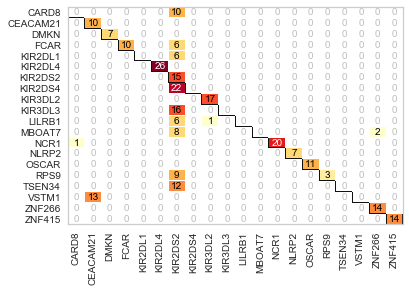

In [83]:
from yellowbrick.classifier import ConfusionMatrix
# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(base_locus_clf.fit(features_locus_train, target_locus_train))
cm.score(features_locus_test, target_locus_test)

In [53]:
# base decision tree for strand testing
from sklearn.tree import DecisionTreeClassifier
base_strand_clf = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=19)
base_strand_clf.fit(features_strand_train, target_strand_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=19, splitter='best')

In [54]:
# base decision tree accuracy scores for strand testing
print('Strand Base Decision Tree Training Accuracy is: {0}'.format(base_strand_clf.score(features_strand_train, target_strand_train)*100))
print('Strand Base Decision Tree Testing Accuracy is: {0}'.format(base_strand_clf.score(features_strand_test, target_strand_test)*100))

Strand Base Decision Tree Training Accuracy is: 65.41353383458647
Strand Base Decision Tree Testing Accuracy is: 63.77755511022044


C:\Users\eannefawcett\Anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
C:\Users\eannefawcett\Anaconda3\envs\learn-env\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


0.6377755511022044

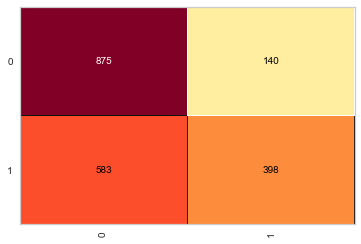

In [85]:
cm = ConfusionMatrix(base_strand_clf.fit(features_strand_train, target_strand_train))
cm.score(features_strand_test, target_strand_test)

While these models are not great for either study, they at least indicate that there is better than random chance that classification might occur. Due to the number of features, it might be possible that false paths for classification are being followed. To determine if this is the case or not, a bagged classification model is in order. In a bagged classifier, a determined percentage of the features present are left out of the classification process for each time the classifer is run. This then provides higher weights to feature that produce more accurate models based on the training data.

## Bagged Model

In [55]:
# bagged model for locus testing
from sklearn.ensemble import BaggingClassifier
tree_locus = base_locus_clf
bagged_locus_tree = BaggingClassifier(tree_locus, n_estimators=15, random_state=19)
bagged_locus_tree.fit(features_locus_train, target_locus_train)
print('Locus Bagged Training Accuracy is: {0}'.format(bagged_locus_tree.score(features_locus_train, target_locus_train)*100))
print('Locus Bagged Testing Accuracy is: {0}'.format(bagged_locus_tree.score(features_locus_test, target_locus_test)*100))

Locus Bagged Training Accuracy is: 99.12280701754386
Locus Bagged Testing Accuracy is: 98.87218045112782


C:\Users\eannefawcett\Anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
C:\Users\eannefawcett\Anaconda3\envs\learn-env\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


0.9887218045112782

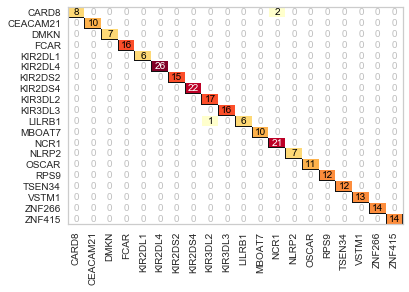

In [86]:
cm = ConfusionMatrix(bagged_locus_tree.fit(features_locus_train, target_locus_train))
cm.score(features_locus_test, target_locus_test)

In [56]:
# bagged model for strand testing
tree_strand = base_strand_clf
bagged_strand_tree = BaggingClassifier(tree_strand, n_estimators=15, random_state=19)
bagged_strand_tree.fit(features_strand_train, target_strand_train)
print('Strand Bagged Training Accuracy is: {0}'.format(bagged_strand_tree.score(features_strand_train, target_strand_train)*100))
print('Strand Bagged Testing Accuracy is: {0}'.format(bagged_strand_tree.score(features_strand_test, target_strand_test)*100))

Strand Bagged Training Accuracy is: 77.37677527151212
Strand Bagged Testing Accuracy is: 73.09619238476954


C:\Users\eannefawcett\Anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
C:\Users\eannefawcett\Anaconda3\envs\learn-env\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


0.7309619238476954

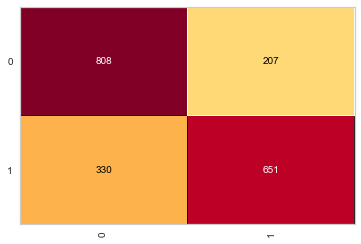

In [87]:
cm = ConfusionMatrix(bagged_strand_tree.fit(features_strand_train, target_strand_train))
cm.score(features_strand_test, target_strand_test)

These improved training and testing accuracies for both studies show that some features are false indicators for classification. To increase the robustness of this type of structure, a random forest classification can be used.

## Random Forest Model

In [57]:
# random forest for locus testing
from sklearn.ensemble import RandomForestClassifier
forest_locus = RandomForestClassifier(n_estimators=15, max_depth=5, random_state=19)
forest_locus.fit(features_locus_train, target_locus_train)
print('Locus Forest Training Accuracy is: {0}'.format(forest_locus.score(features_locus_train, target_locus_train)*100))
print('Locus Forest Testing Accuracy is: {0}'.format(forest_locus.score(features_locus_test, target_locus_test)*100))

Locus Forest Training Accuracy is: 98.99749373433583
Locus Forest Testing Accuracy is: 99.24812030075188


C:\Users\eannefawcett\Anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
C:\Users\eannefawcett\Anaconda3\envs\learn-env\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


0.9924812030075187

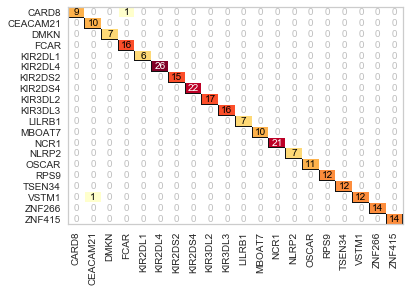

In [88]:
cm = ConfusionMatrix(forest_locus.fit(features_locus_train, target_locus_train))
cm.score(features_locus_test, target_locus_test)

In [58]:
# random forest for strand testing
from sklearn.ensemble import RandomForestClassifier
forest_strand = RandomForestClassifier(n_estimators=15, max_depth=5, random_state=19)
forest_strand.fit(features_strand_train, target_strand_train)
print('Strand Forest Training Accuracy is: {0}'.format(forest_strand.score(features_strand_train, target_strand_train)*100))
print('Strand Forest Accuracy is: {0}'.format(forest_strand.score(features_strand_test, target_strand_test)*100))

Strand Forest Training Accuracy is: 76.05680868838763
Strand Forest Accuracy is: 71.7434869739479


C:\Users\eannefawcett\Anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
C:\Users\eannefawcett\Anaconda3\envs\learn-env\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


0.717434869739479

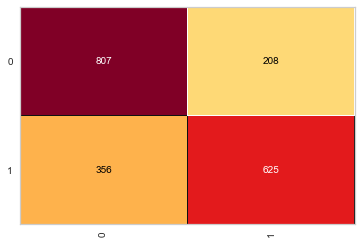

In [89]:
cm = ConfusionMatrix(forest_strand.fit(features_strand_train, target_strand_train))
cm.score(features_strand_test, target_strand_test)

For the locus study, these results are phenomenal, and can be used in the scientific community, which often requires accuracies greater than 98%. For the strand study, the results have decreased from the bagged classifier model. Some optimization of parameters might be in order. To do this, a pipeline of selected parameters and their values can be used in a grid search to identify which parameters and their associated value will produce the highest results.

<a href='#Table of Contents'>Back to Table of Contents</a>

# Final Model<a id='Final Model'></a>

## Training and Pruning Random Forests

The following parameters were selected for evaluation:
- n_estimators
- max_depth
- min_samples_split.

Number of estimators was selected to optimize for memory purposes.
Maximum depth was selected to optimize for number of decisions to be made before selecting a classfication.
Minimum samples before splitting to a new branch was selected to optimize because it allows some sort of control over how big each of the classifing pools is.
All of these parameters aim to maximize the amount of data gained, while minimizing computations required.

In [59]:
# grid search using pipeline for best parameters for locus testing
# from sklearn.model_selection import GridSearchCV

# vanilla_forest_locus = RandomForestClassifier(random_state=19)

# locus_param_grid = {'n_estimators' : [i for i in range(1, len(features_locus_train), 25)],
#                     'max_depth' : np.linspace(1, 20),
#                     'min_samples_split' : np.linspace(0.1, 1, num=10)}

# locus_grid_search = GridSearchCV(estimator=vanilla_forest_locus, param_grid=locus_param_grid, cv=5, refit=True)
# locus_grid_search.fit(features_locus_train, target_locus_train)

In [60]:
from sklearn.externals import joblib

C:\Users\eannefawcett\Anaconda3\envs\learn-env\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [61]:
# grid search file dump
# joblib.dump(locus_grid_search.best_estimator_, 'locus_19_gridsearch_best_estimator.pkl')
# joblib.dump(locus_grid_search, 'locus_19_gridsearch.pkl')

In [62]:
# grid search best parameters accuracy for locus testing
locus_grid_search = joblib.load('locus_19_gridsearch.pkl')
locus_best_estimator = joblib.load('locus_19_gridsearch_best_estimator.pkl')
locus_best_estimator.fit(features_locus_train, target_locus_train)
print('Locus Search Forest Training Accuracy is: {0}'.format(locus_best_estimator.score(features_locus_train, 
                                                                                        target_locus_train)*100))
print('Locus Search Forest Testing Accuracy is: {0}'.format(locus_best_estimator.score(features_locus_test, 
                                                                                       target_locus_test)*100))

Locus Search Forest Training Accuracy is: 98.99749373433583
Locus Search Forest Testing Accuracy is: 99.62406015037594


In [63]:
locus_grid_search.best_params_

{'max_depth': 8.36734693877551, 'min_samples_split': 0.1, 'n_estimators': 151}

C:\Users\eannefawcett\Anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
C:\Users\eannefawcett\Anaconda3\envs\learn-env\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


0.9962406015037594

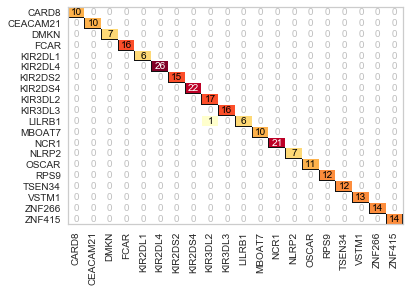

In [90]:
cm = ConfusionMatrix(locus_best_estimator.fit(features_locus_train, target_locus_train))
cm.score(features_locus_test, target_locus_test)

While for the locus study, there isn't an improvement from the base random forest model, at least the parameters have been optimized for the selected criteria. And this performance is still above the 98% accuracy required by the field of medicine.

In [64]:
# grid search using pipeline for best parameters for strand testing
# from sklearn.model_selection import GridSearchCV

# vanilla_forest_strand = RandomForestClassifier(random_state=19)

# strand_param_grid = {'n_estimators' : [i for i in range(1, len(features_locus_train), 25)],
#                      'max_depth' : np.linspace(1, 20),
#                      'min_samples_split' : np.linspace(0.1, 1, num=10)}

# strand_grid_search = GridSearchCV(estimator=vanilla_forest_strand, param_grid=strand_param_grid, cv=5, refit=True)
# strand_grid_search.fit(features_strand_train, target_strand_train)

In [65]:
# grid search file dump
# joblib.dump(strand_grid_search.best_estimator_, 'strand_19_gridsearch_best_estimator.pkl')
# joblib.dump(strand_grid_search, 'strand_19_gridsearch.pkl')

In [66]:
# grid search best parameters accuracy for strand testing
strand_grid_search = joblib.load('strand_19_gridsearch.pkl')
strand_best_estimator = joblib.load('strand_19_gridsearch_best_estimator.pkl')
strand_best_estimator.fit(features_strand_train, target_strand_train)
print('Strand Search Forest Training Accuracy is: {0}'.format(strand_best_estimator.score(features_strand_train, 
                                                                                          target_strand_train)*100))
print('Strand Search Forest Testing Accuracy is: {0}'.format(strand_best_estimator.score(features_strand_test, 
                                                                                         target_strand_test)*100))

Strand Search Forest Training Accuracy is: 74.72013366750208
Strand Search Forest Testing Accuracy is: 71.4929859719439


In [67]:
strand_grid_search.best_params_

{'max_depth': 19.224489795918366,
 'min_samples_split': 0.1,
 'n_estimators': 451}

C:\Users\eannefawcett\Anaconda3\envs\learn-env\lib\site-packages\sklearn\base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)
C:\Users\eannefawcett\Anaconda3\envs\learn-env\lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


0.7149298597194389

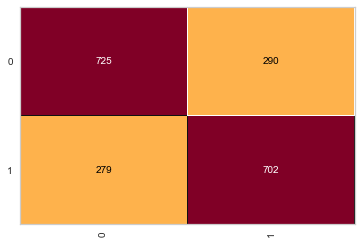

In [91]:
cm = ConfusionMatrix(strand_best_estimator.fit(features_strand_train, target_strand_train))
cm.score(features_strand_test, target_strand_test)

This model for the strand study does improve on the base random forest model; however, does not improve on the bagged classification model. Some other approaches to the strand study seem to be in order.

<a href='#Table of Contents'>Back to Table of Contents</a>

# Other Models <a id='Other Models'></a>

Before closing the door on either the locus or strand study, some other types of data manipulation beg to be evaluated. The first type of data manipulation evaluated is scaling the data. The second type studied deals with the number of features present by using principal component analysis.

## Scaled Models <a id='Scaled Models'></a>

In [68]:
# scaling features and target variables for locus and strand testing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_locus_train_transform = scaler.fit_transform(features_locus_train)
features_locus_test_transform = scaler.transform(features_locus_test)
features_strand_train_transform = scaler.fit_transform(features_strand_train)
features_strand_test_transform = scaler.transform(features_strand_test)

In [69]:
# scaled decision tree for locus testing
scaled_base_locus_clf = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=19)
scaled_base_locus_clf.fit(features_locus_train_transform, target_locus_train)
print('Locus Scaled Decision Training Accuracy is: {0}'.format(scaled_base_locus_clf.score(features_locus_train, 
                                                                                           target_locus_train)*100))
print('Locus Scaled Decision Testing Accuracy is: {0}'.format(scaled_base_locus_clf.score(features_locus_test,
                                                                                          target_locus_test)*100))

Locus Scaled Decision Training Accuracy is: 9.649122807017543
Locus Scaled Decision Testing Accuracy is: 6.390977443609022


In [70]:
# scaled decision tree for strand testing
scaled_base_strand_clf = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=19)
scaled_base_strand_clf.fit(features_strand_train_transform, target_strand_train)
print('Strand Scaled Decision Training Accuracy is: {0}'.format(scaled_base_strand_clf.score(features_strand_train, 
                                                                                             target_strand_train)*100))
print('Strand Scaled Decision Testing Accuracy is: {0}'.format(scaled_base_strand_clf.score(features_strand_test, 
                                                                                            target_strand_test)*100))

Strand Scaled Decision Training Accuracy is: 50.342522974101925
Strand Scaled Decision Testing Accuracy is: 50.851703406813634


In [71]:
# scaled bagged model for locus testing
scaled_bagged_locus_tree = BaggingClassifier(tree_locus, n_estimators=15, random_state=19)
scaled_bagged_locus_tree.fit(features_locus_train_transform, target_locus_train)
print('Locus Scaled Bagged Training Accuracy is: {0}'.format(scaled_bagged_locus_tree.score(features_locus_train, 
                                                                                            target_locus_train)*100))
print('Locus Scaled Bagged Testing Accuracy is: {0}'.format(scaled_bagged_locus_tree.score(features_locus_test, 
                                                                                           target_locus_test)*100))

Locus Scaled Bagged Training Accuracy is: 4.135338345864661
Locus Scaled Bagged Testing Accuracy is: 2.631578947368421


In [72]:
# scaled bagged model for strand testing
scaled_bagged_strand_tree = BaggingClassifier(tree_strand, n_estimators=15, random_state=19)
scaled_bagged_strand_tree.fit(features_strand_train_transform, target_strand_train)
print('Strand Scaled Bagged Training Accuracy is: {0}'.format(scaled_bagged_strand_tree.score(features_strand_train, 
                                                                                              target_strand_train)*100))
print('Strand Scaled Bagged Testing Accuracy is: {0}'.format(scaled_bagged_strand_tree.score(features_strand_test, 
                                                                                              target_strand_test)*100))

Strand Scaled Bagged Training Accuracy is: 50.37593984962406
Strand Scaled Bagged Testing Accuracy is: 50.80160320641283


In [73]:
# scaled random forest for locus testing
scaled_forest_locus = RandomForestClassifier(n_estimators=15, max_depth=5, random_state=19)
scaled_forest_locus.fit(features_locus_train_transform, target_locus_train)
print('Locus Scaled Forest Training Accuracy is: {0}'.format(scaled_forest_locus.score(features_locus_train, 
                                                                                       target_locus_train)*100))
print('Locus Scaled Forest Testing Accuracy is: {0}'.format(scaled_forest_locus.score(features_locus_test, 
                                                                                       target_locus_test)*100))

Locus Scaled Forest Training Accuracy is: 4.135338345864661
Locus Scaled Forest Testing Accuracy is: 2.631578947368421


In [74]:
# scaled random forest for strand testing
scaled_forest_strand = RandomForestClassifier(n_estimators=15, max_depth=5, random_state=19)
scaled_forest_strand.fit(features_strand_train_transform, target_strand_train)
print('Strand Scaled Forest Training Accuracy is: {0}'.format(scaled_forest_strand.score(features_strand_train, 
                                                                                         target_strand_train)*100))
print('Strand Scaled Forest Testing Accuracy is: {0}'.format(scaled_forest_strand.score(features_strand_test, 
                                                                                        target_strand_test)*100))

Strand Scaled Forest Training Accuracy is: 50.07518796992482
Strand Scaled Forest Testing Accuracy is: 50.95190380761523


I expect that scaling the data wasn't effective in this case because the scale for each feature is set upon inclusion. By that I mean that including the amino acid, lenght, and weight features give the scale to the other features present. They contextualize the information of sequence, both quantitatively and biochemically. 

## PCA Models <a id='PCA Models'></a>

In [75]:
# data to use for PCA
# features_locus_train_transform
# features_locus_test_transform
# features_strand_train_transform
# features_strand_test_transform
# target_locus_train
# target_locus_test
# target_strand_train
# target_strand_test

In [76]:
# set up the PCA for locus testing
from sklearn.decomposition import PCA
pca = PCA()
locus_pca_features = pca.fit_transform(features_locus_train_transform)

In [77]:
# determine the least number of features necessary to explain at least 95% variance in training data for locus testing
total_explained_variance = pca.explained_variance_ratio_.cumsum()
n_over_95 = len(total_explained_variance[total_explained_variance >= 0.95])
n_to_reach_95 = features_locus_train_transform.shape[1] - n_over_95 + 1
print('Number of Features: {}'.format(n_to_reach_95))
print('\nTotal Variance Explained: {}'.format(total_explained_variance[n_to_reach_95-1]*100))

Number of Features: 45

Total Variance Explained: 95.12388435407526


In [78]:
# use the previously determined number of feature to run PCA on a Random Forest model for locus testing
locus_pca = PCA(n_components=n_to_reach_95, random_state=19)
locus_features_pca_train = locus_pca.fit_transform(features_locus_train_transform)
locus_features_pca_test = locus_pca.fit_transform(features_locus_test_transform)
locus_pca_forest = RandomForestClassifier(random_state=19)
locus_pca_forest.fit(locus_features_pca_train, target_locus_train)
print('Locus PCA Training Accuracy is: {0}'.format(locus_pca_forest.score(locus_features_pca_train, 
                                                                          target_locus_train)*100))
print('Loucs PCA Testing Accuracy is: {0}'.format(locus_pca_forest.score(locus_features_pca_test, 
                                                                         target_locus_test)*100))
print('\nTotal Variance Explained: {}'.format(locus_pca.explained_variance_ratio_.cumsum()[-1]*100))

Locus PCA Training Accuracy is: 100.0
Loucs PCA Testing Accuracy is: 3.7593984962406015

Total Variance Explained: 97.16188854975918


In [79]:
# set up the PCA for strand testing
pca = PCA()
strand_pca_features = pca.fit_transform(features_strand_train_transform)

In [80]:
# determine the least number of features necessary to explain at least 95% variance in training data for locus testing
total_explained_variance = pca.explained_variance_ratio_.cumsum()
n_over_95 = len(total_explained_variance[total_explained_variance >= 0.95])
n_to_reach_95 = features_strand_train_transform.shape[1] - n_over_95 + 1
print('Number of Features: {}'.format(n_to_reach_95))
print('\nTotal Variance Explained: {}'.format(total_explained_variance[n_to_reach_95-1]*100))

Number of Features: 1262

Total Variance Explained: 95.03579505850689


In [81]:
# use the previously determined number of feature to run PCA on a Random Forest model for strand testing
strand_pca = PCA(n_components=n_to_reach_95, random_state=19)
strand_features_pca_train = strand_pca.fit_transform(features_strand_train_transform)
strand_features_pca_test = strand_pca.fit_transform(features_strand_test_transform)
strand_pca_forest = RandomForestClassifier(random_state=19)
strand_pca_forest.fit(strand_features_pca_train, target_strand_train)
print('Strand PCA Training Accuracy is: {0}'.format(strand_pca_forest.score(strand_features_pca_train, 
                                                                            target_strand_train)*100))
print('Strand PCA Testing Accuracy is: {0}'.format(strand_pca_forest.score(strand_features_pca_test, 
                                                                          target_strand_test)*100))
print('\nTotal Variance Explained: {}'.format(strand_pca.explained_variance_ratio_.cumsum()[-1]*100))

Strand PCA Training Accuracy is: 100.0
Strand PCA Testing Accuracy is: 52.204408817635276

Total Variance Explained: 99.99999999999996


In the PCA models, I expect that the same thing happened as in the scaled models. Each included feature (despite their being over 200) contextualizes other information in the dataset. When some of the features are lost, then our chances of being right in testing diminish.

<a href='#Table of Contents'>Back to Table of Contents</a>

# Conclusions<a id='Conclusions'></a>

To conclude, there is a way to predict the location of genetic information based on amino acid content, as seen in the locus study Random Forest Classification Results. While there is something to amino acid content determining whether or not the amino acid's can build a protein, specifics about the strand study remain to be seen.

<a href='#Table of Contents'>Back to Table of Contents</a>

# References<a id='References'></a>
1. https://www.ncbi.nlm.nih.gov/grc/help/definitions/ # sequence role definitions
2. https://stackoverflow.com/questions/44333573/feature-importances-bagging-scikit-learn # feature importances for bagged model
3. https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html # multiclass roc

<a href='#Table of Contents'>Back to Table of Contents</a>

# Future Work<a id='Future Work'></a>

## PCA Grid Search

In [ ]:
# locus pca grid search
# from sklearn.model_selection import GridSearchCV

# vanilla_forest_locus = RandomForestClassifier(random_state=19)

# param_grid = {'n_estimators' : [i for i in range(1, n_to_reach_95+1)],
#               'max_depth' : np.linspace(1, 20),
#               'min_samples_split' : np.linspace(0.1, 1, num=10)}

# grid_search = GridSearchCV(estimator=vanilla_forest_locus, param_grid=param_grid, cv=5, refit=True)
# grid_search.fit(locus_features_pca_train, target_locus_train)

In [ ]:
# strand pca grid search
# from sklearn.model_selection import GridSearchCV

# vanilla_forest_locus = RandomForestClassifier(random_state=19)

# param_grid = {'n_estimators' : [i for i in range(1, n_to_reach_95+1)],
#               'max_depth' : np.linspace(1, 20),
#               'min_samples_split' : np.linspace(0.1, 1, num=10)}

# grid_search = GridSearchCV(estimator=vanilla_forest_locus, param_grid=param_grid, cv=5, refit=True)
# grid_search.fit(strand_features_pca_train, target_strand_train)

## XGBoost

## SVM

## Other Data Manipulation Techniques

### Synthetic Minority Over-sampling Technique

<a href='#Table of Contents'>Back to Table of Contents</a>